<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_1893/NGC_1893_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [244]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [245]:
!pip install astroquery

In [246]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


#### Finding GAIA Data

In [247]:
## making a GAIA cone_search of 30m radius around NGC1893 center

coordinate = coord.SkyCoord.from_name('NGC1893')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (80.68333333, 33.41166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [248]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 181173647673361280,181173647673361280,1483864201,2015.5,80.684603,0.033843,33.412081,0.025595,0.353639,0.036231,9.760555,0.137340,0.065628,-1.251084,0.043157,-0.404071,0.126200,-0.415880,0.464060,-0.331484,0.289410,-0.543771,0.352913,0.232732,-0.329534,142,0,142,0,0.819498,150.307465,0.000000,0.000000,31,False,82.927475,1.677050,0.007350,-0.170126,...,40087.897710,88.817455,451.351562,13.254387,1.216119,0,0.474896,0.147382,0.327515,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585244,-1.679365,82.108439,10.227637,100001,7270.930176,7098.100098,7807.00000,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.939201,2.549417,3.084076,21.752707,16.569754,26.935659,https://gea.esac.esa.int/data-server/datalink/...,,0.001133
1,1635721458409799680,Gaia DR2 181173647670255232,181173647670255232,694905700,2015.5,80.685344,0.317080,33.410823,0.253937,-0.136818,0.395804,-0.345672,1.221537,0.727228,-1.041465,0.503148,-0.313737,0.232041,0.194107,0.056717,-0.537575,0.002978,-0.240740,0.063160,0.401163,-0.475289,142,0,141,1,1.439612,160.405792,0.000000,0.006779,31,False,0.249249,1.534035,0.072411,-0.180904,...,546.698549,21.273059,25.699104,17.917551,1.915866,0,1.102009,-0.004078,1.106087,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.586632,-1.679567,82.108983,10.226341,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001870
2,1635721458409799680,Gaia DR2 181173643375562240,181173643375562240,751395326,2015.5,80.682794,0.280308,33.414174,0.230233,0.476046,0.359589,1.323862,-2.477787,0.608541,-0.443799,0.435851,-0.314617,0.331319,0.186329,0.131048,-0.560377,-0.047011,-0.207994,0.190062,0.359596,-0.403558,143,0,143,0,0.208735,140.820099,0.000000,0.000000,31,False,0.309160,1.443662,0.064041,-0.131571,...,806.455459,9.672464,83.376427,17.495468,2.004344,0,1.870014,0.479704,1.390310,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582663,-1.679426,82.107047,10.229824,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002554
3,1635721458409799680,Gaia DR2 181173647670249088,181173647670249088,484695233,2015.5,80.682736,0.260291,33.414937,0.213979,0.567555,0.327464,1.733185,0.489020,0.535777,-2.092622,0.383637,-0.336726,0.304620,0.056802,0.243668,-0.532871,0.045078,-0.304211,0.221608,0.356029,-0.351383,147,0,147,0,2.146245,180.543427,0.678741,1.620727,31,False,0.349386,1.386778,0.058317,-0.127316,...,875.127187,14.162034,61.793892,17.406742,1.738860,0,1.806957,0.586079,1.220879,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.582006,-1.679034,82.107049,10.230589,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa

##### Applying Filter:

In [249]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [250]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [251]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [252]:
all_stars_filtered.shape

(12378, 99)

##### Visualizing GAIA data

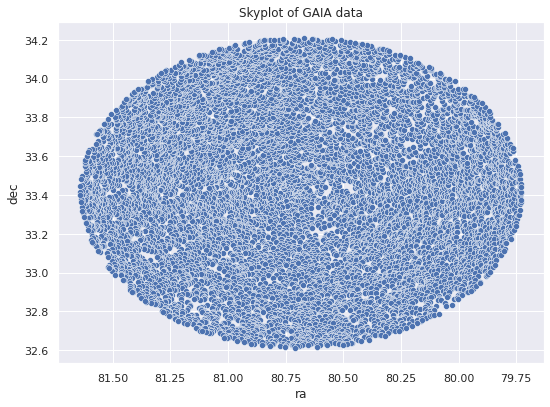

In [253]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [254]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [255]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [256]:
## saving only NGC 1893 data from Cantat GAIA DR2 paper

cantat_1893 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_1893")
cantat_1893 = cantat_1893[0].to_pandas()
cantat_1893

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,81.149455,33.284768,182470723501404800,0.3615,0.117,-0.714,NaN,17.414000,1.2091,0.1,NGC_1893,81.149455,33.284771
1,81.119439,33.363766,182472308346167936,0.2641,-0.608,-0.591,39.269804,13.264800,1.9393,0.1,NGC_1893,81.119442,33.363768
2,81.131238,33.508885,182486842515427840,0.1172,0.070,-0.804,NaN,16.060801,1.9589,0.2,NGC_1893,81.131237,33.508888
3,81.006873,33.548464,182490690806147712,0.2768,-0.094,-1.682,NaN,14.954500,1.8016,0.8,NGC_1893,81.006874,33.548471
4,81.122228,33.440556,182485949162263680,0.2378,0.316,-1.816,NaN,17.271099,1.3154,0.3,NGC_1893,81.122226,33.440563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,80.738744,33.441257,181174128709666304,0.3098,-0.185,-1.245,NaN,14.454100,0.5358,0.9,NGC_1893,80.738745,33.441263
490,80.759437,33.527037,181177044990761088,0.3628,-0.031,-0.890,NaN,11.109000,0.3429,0.5,NGC_1893,80.759438,33.527041
491,80.486479,33.742721,181197695194288640,0.3737,0.487,-1.105,NaN,17.628500,1.3684,0.1,NGC_1893,80.486477,33.742726
492,80.688044,33.406547,181173643374509824,0.3148,-0.548,-1.372,NaN,12.207800,0.4295,0.6,NGC_1893,80.688047,33.406553


In [257]:
# renaming the cantat table to match it with gaia_data
cantat_1893 = cantat_1893.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [258]:
# taking the subset of only source_id and PMemb
cantat_1893 = cantat_1893.loc[:,['source_id', 'PMemb']]


In [259]:
# join the two table on source_id
cantat_1893 = all_stars_filtered.join(cantat_1893.set_index('source_id'), on='source_id')

In [260]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1893 = cantat_1893.dropna(subset=['PMemb'])
cantat_1893

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
18,1635721458409799680,Gaia DR2 181173643374509824,181173643374509824,12658542,2015.5,80.688044,0.073149,33.406547,0.053959,0.314849,0.089981,3.499050,-0.548015,0.129628,-1.372174,0.091755,-0.230392,0.371752,-0.130362,0.362375,-0.409524,0.102849,-0.457819,0.315687,0.418044,-0.088826,139,139,134,5,16.238333,603.241150,0.159951,7.469649,31,True,32.085251,1.686489,0.019010,-0.035129,...,11.908504,1.211550,0,0.429462,0.130186,0.299276,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.591435,-1.680128,82.110984,10.221927,100001,7501.000000,7178.500000,7841.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.006447,4.227584,14.954793,0.6
23,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000,31,False,123.804367,1.541493,0.006539,-0.101404,...,12.509538,1.268399,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.398450,9.071594,9.717874,45.846313,34.468830,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007357,5.386812,39.162434,1.0
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000,31,False,65.744781,1.676015,0.009007,-0.171690,...,13.461381,1.230588,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008474,3.584699,28.508622,1.0
73,1635721458409799680,Gaia DR2 181173578953884928,181173578953884928,644466528,2015.5,80.694178,0.032708,33.403604,0.026391,0.243681,0.039949,6.099824,-0.282915,0.059370,-1.502633,0.042442,-0.282469,0.285888,-0.205000,0.379250,-0.481303,0.133841,-0.498318,0.285470,0.390419,-0.095825,159,0,158,1,-2.801394,108.510246,0.000000,0.000000,31,False,48.302460,1.603814,0.007923,-0.109446,...,13.665700,1.230268,0,0.862517,0.335684,0.526834,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.596761,-1.677571,82.115980,10.218656,100001,5599.800293,5400.000000,5833.333496,1.9850,1.7300,2.2835,1.0010,0.8580,1.1168,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,ht

In [261]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1893.to_csv('NGC_1893_cantat.csv')
# all_stars.to_csv('NGC_1893_Gaia_30m.csv')

In [262]:
cantat_1893.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,9.500000e+01,9.500000e+01,9.500000e+01,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,2.000000,2.000000,95.000000,2.000000,2.000000,2.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,95.000000,95.000000,95.000000,95.000000
mean,1.635721e+18,1.814778e+17,9.086183e+08,2015.5,80.737729,0.045930,33.451814,0.037100,0.286307,0.053067,5.802793,-0.236717,0.087543,-1.415327,0.062652,-0.176406,0.187772,-0.216885,0.275988,-0.388526,0.161097,-0.502305,0.165382,0.362657,-0.089516,151.400000,20.315789,150.368421,1.031579,0.751268,167.929306,0.019309,0.310494,31.0,67.488770,1.564288,0.010065,-0.095931,17.231579,10.368421,...,7.065597e+04,157.056990,526.608459,13.865883,1.264505,0.063158,1.073779,0.459204,0.614576,18.699157,0.960644,0.084211,5750.000000,4.000000,0.0,173.577386,-1.620280,82.155999,10.264513,100043.168421,5605.711426,5379.130371,5940.588867,1.332680,1.073189,1.754675,0.665039,0.530461,0.878406,200111.0,7.369964,6.384611,8.115256,74.662605,56.289097,93.036079,0.202596,5.822002,24.711216,0.488421
std,0.000000e+00,6.373655e+14,5.161394e+08,0.0,0.202292,0.014608,0.164871,0.011474,0.060320,0.016115,1.969565,0.475649,0.028485,0.299638,0.020973,0.175198,0.128979,0.138882,0.144348,0.117959,0.139866,0.102267,0.111213,0.100389,0.161293,17.039004,49.197661,16.971223,1.439951,3.767038,86.005760,0.046648,1.026811,0.0,99.665451,0.100472,0.003060,0.066510,1.915517,0.669274,...,1.715634e+05,407.322455,507.556061,1.425294,0.054896,0.244537,0.521627,0.287345,0.237122,29.091288,0.217557,0.646811,353.553406,0.707107,0.0,0.151073,0.181336,0.173589,0.162810,288.633599,1365.227661,1281.678467,1375.727295,0.480705,0.490865,0.488560,0.229899,0.242647,0.247465,0.0,5.314381,4.684245,5.825412,150.146576,114.118439,186.396912,0.133883,3.097324,8.765409,0.339857
min,1.635721e+18,1.809525e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.034939,-1.120928,0.049882,-2.314877,0.035424,-0.669206,-0.100532,-0.597216,-0.131934,-0.647679,-0.158013,-0.717670,-0.130885,0.081193,-0.485993,114.000000,0.000000,113.000000,0.000000,-5.626834,73.171104,0.000000,0.000000,31.0,2.916422,1.333996,0.00511

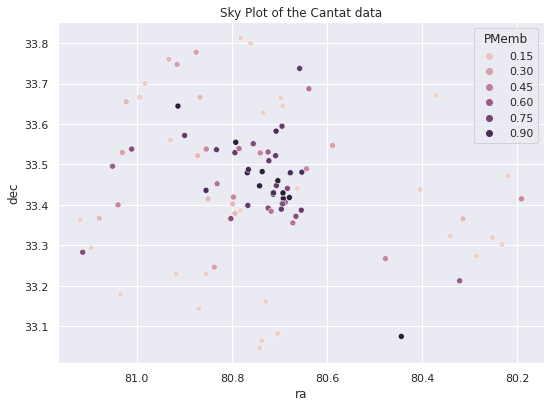

In [263]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_1893['ra'], y = cantat_1893['dec'], 
                          hue = cantat_1893['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [264]:
# import member dataset
member = cantat_1893.copy()

In [265]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1893_center'] = distance

In [266]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_1893_center)
cantat_radius

0.4111543036750739

In [267]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
18,1635721458409799680,Gaia DR2 181173643374509824,181173643374509824,12658542,2015.5,80.688044,0.073149,33.406547,0.053959,0.314849,0.089981,3.499050,-0.548015,0.129628,-1.372174,0.091755,-0.230392,0.371752,-0.130362,0.362375,-0.409524,0.102849,-0.457819,0.315687,0.418044,-0.088826,139,139,134,5,16.238333,603.241150,0.159951,7.469649,31,True,32.085251,1.686489,0.019010,-0.035129,...,0,0.429462,0.130186,0.299276,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.591435,-1.680128,82.110984,10.221927,100001,7501.000000,7178.500000,7841.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.006447,4.227584,14.954793,0.6,0.006455,1
23,1635721458409799680,Gaia DR2 181174403587604224,181174403587604224,1269934252,2015.5,80.679222,0.027111,33.418166,0.021730,0.312039,0.032525,9.593742,-0.268702,0.049882,-1.387273,0.035424,-0.246148,0.266331,-0.228977,0.354428,-0.449093,0.136382,-0.492036,0.280176,0.374393,-0.087387,160,0,160,0,-4.178366,91.986031,0.000000,0.000000,31,False,123.804367,1.541493,0.006539,-0.101404,...,0,1.155943,0.477227,0.678716,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.577683,-1.679625,82.104290,10.234003,100001,4899.190430,4818.000000,4986.669922,NaN,NaN,NaN,NaN,NaN,NaN,200111,9.39845,9.071594,9.717874,45.846313,34.46883,57.223797,https://gea.esac.esa.int/data-server/datalink/...,,0.007357,5.386812,39.162434,1.0,0.007349,1
33,1635721458409799680,Gaia DR2 181174025630479360,181174025630479360,29884937,2015.5,80.692027,0.047236,33.416048,0.032241,0.352295,0.064405,5.470024,-0.247113,0.068936,-1.468851,0.051523,-0.507853,0.646235,0.146307,0.535540,-0.635479,-0.073588,-0.601952,0.417870,0.597423,0.043620,131,0,129,2,-3.345325,77.936180,0.000000,0.000000,31,False,65.744781,1.676015,0.009007,-0.171690,...,0,0.590916,0.191039,0.399877,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.585480,-1.672010,82.114987,10.231190,100001,6852.666504,6480.000000,7243.500000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008474,3.584699,28.508622,1.0,0.008477,1
73,1635721458409799680,Gaia DR2 181173578953884928,181173578953884928,644466528,2015.5,80.694178,0.032708,33.403604,0.026391,0.243681,0.039949,6.099824,-0.282915,0.059370,-1.502633,0.042442,-0.282469,0.285888,-0.205000,0.379250,-0.481303,0.133841,-0.498318,0.285470,0.390419,-0.095825,159,0,158,1,-2.801394,108.510246,0.000000,0.000000,31,False,48.302460,1.603814,0.007923,-0.109446,...,0,0.862517,0.335684,0.526834,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.596761,-1.677571,82.115980,10.218656,100001,5599.800293,5400.000000,5833.333496,1.9850,1.7300,2.2835,1.0010,0.858,1.1168,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.012114,4.7652

In [268]:
### adding their distance from the center of the clusters

## NGC 1893
center = coord.SkyCoord.from_name('NGC1893')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1893_center'] = distance

In [269]:
non_member = all_stars_filtered[all_stars_filtered['dist_1893_center'] >= 0.7].sample(len(member), random_state = 42)

In [270]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member
66429,1635721458409799680,Gaia DR2 180927593288781568,180927593288781568,257537342,2015.5,80.740733,0.131990,32.708219,0.110233,0.440503,0.145668,3.024015,2.085726,0.261639,-0.760635,0.186852,-0.039753,0.135844,-0.226953,0.340695,-0.239865,0.275516,-0.272485,0.224938,0.342415,-0.110890,132,0,131,1,1.455698,149.800552,0.276489,0.845850,31,False,1.348632,1.461795,0.035709,0.019985,...,1.27815,0,1.380032,0.614843,0.765188,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,174.192684,-2.038587,82.109533,9.522206,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.705085,7.971766,4.070788,0.705103,0
82023,1635721458409799680,Gaia DR2 181035173636901888,181035173636901888,622355928,2015.5,80.126339,0.169034,32.779770,0.134721,0.889120,0.215194,4.131713,-2.311796,0.323733,-5.435695,0.225644,-0.007722,0.179633,-0.088684,0.216371,-0.363381,0.179510,-0.470537,0.091806,0.490310,-0.044242,167,0,166,1,53.257084,4248.727539,1.158090,185.975963,31,False,0.708004,1.609301,0.035335,-0.038039,...,1.31144,0,1.027083,0.361935,0.665149,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.840194,-2.423429,81.591512,9.628239,100001,5339.000000,5093.000000,5396.000000,1.1307,0.8069,1.8903,0.5620,0.3799,0.9187,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.785512,7.141058,24.089731,0.786509,0
84178,1635721458409799680,Gaia DR2 182526046971915648,182526046971915648,782279427,2015.5,81.391280,0.073535,33.947104,0.060244,0.356045,0.087194,4.083371,-0.874804,0.155470,-0.876470,0.109651,-0.233694,0.168369,-0.243854,0.284982,-0.440711,0.102189,-0.377604,0.270568,0.277958,-0.288982,133,0,133,0,-1.410938,106.136650,0.000000,0.000000,31,False,5.022168,1.523260,0.016330,-0.091268,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.474163,-0.892138,82.739566,10.724538,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.796081,5.626834,7.993284,0.794726,0
76751,1635721458409799680,Gaia DR2 181226419935012736,181226419935012736,370483817,2015.5,79.798547,0.073462,33.591662,0.056341,0.371805,0.078438,4.740086,-0.959171,0.151598,-3.418013,0.112429,-0.074614,0.261256,-0.191662,0.226035,-0.185925,0.164954,-0.334552,0.131279,0.267842,-0.243252,153,0,153,0,-0.902717,132.386124,0.000000,0.000000,31,False,3.970638,1.525443,0.017538,-0.021995,...,1.25586,0,1.250204,0.548117,0.702087,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,173.016542,-2.184435,81.371661,10.457431,100001,4885.254883,4658.476562,5198.580078,1.5030,1.2589,1.6576,0.7415,0.6286,0.8421,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.759440,6.327053,30.401559,0.758689,0
78262,1635721458

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


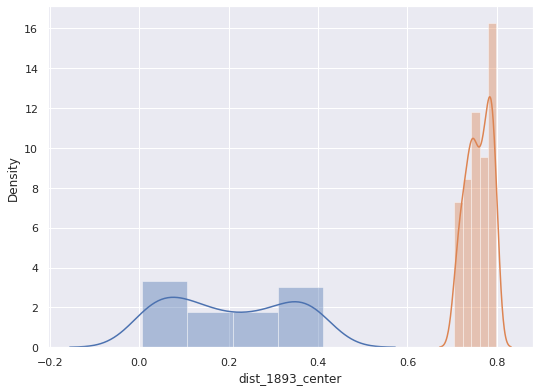

In [271]:
sns.distplot(member['dist_1893_center'])
sns.distplot(non_member['dist_1893_center'])
plt.show()

In [272]:
training_data = pd.concat([member, non_member])

In [273]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,1.900000e+02,1.900000e+02,1.900000e+02,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,189.000000,189.000000,189.000000,190.000000,189.000000,189.000000,189.000000,3.000000,3.000000,190.000000,3.000000,3.000000,3.0,190.000000,190.000000,190.000000,190.000000,151.000000,151.000000,151.000000,151.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,58.0,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,190.000000,190.000000,190.000000,95.000000,190.000000,190.000000
mean,1.635721e+18,1.816121e+17,8.521124e+08,2015.5,80.772885,0.076489,33.404791,0.061621,0.574461,0.085459,8.114392,0.801469,0.156998,-3.202259,0.111958,-0.165116,0.135306,-0.215309,0.249342,-0.362574,0.175568,-0.461336,0.135682,0.343234,-0.148758,152.184211,12.105263,151.178947,1.005263,1.338477,217.463196,0.075003,2.971767,31.0,43.341564,1.526259,0.017027,-0.088692,17.342105,10.331579,...,411.046753,14.750786,1.285397,0.042105,1.244056,0.546978,0.697079,11.778111,0.962503,0.073684,5666.666504,4.166667,0.0,173.632295,-1.622121,82.182798,10.216175,100027.543046,5381.096680,5183.349121,5682.359863,1.157803,0.890350,1.534862,0.576559,0.437263,0.762409,200111.0,4.240164,3.729152,4.631301,33.328419,25.364624,41.292198,0.480755,11.537866,37.845987,0.488421,0.480747,0.500000
std,0.000000e+00,7.244763e+14,5.036633e+08,0.0,0.461477,0.070758,0.406660,0.054580,0.501753,0.071207,7.891669,2.779504,0.144330,4.062829,0.100300,0.176633,0.141903,0.180372,0.177808,0.118165,0.140672,0.130960,0.161319,0.120393,0.205846,16.391466,40.155774,16.298459,1.419805,6.740792,498.810913,0.195088,24.351941,0.0,85.120956,0.102557,0.014291,0.072603,1.861278,0.690489,...,416.618011,1.709956,0.085062,0.201360,0.506294,0.281564,0.231405,23.808698,0.153870,0.629808,288.675140,0.577350,0.0,0.408019,0.383940,0.390318,0.407683,229.399556,1178.676636,1106.062866,1210.100098,0.489218,0.479155,0.535943,0.237571,0.238933,0.268315,0.0,4.601089,4.038162,5.055778,101.910637,77.394691,126.572601,0.295068,17.528714,51.970447,0.339857,0.295068,0.501321
min,1.635721e+18,1.808779e+17,6.862069e+06,2015.5,79.770985,0.023655,32.620012,0.018544,0.144446,0.026150,3.001347,-8.175535,0.047415,-26.096788,0.032748,-0.721711,-0.417984,-0.675355,-0.467403,-0.647679,-0.246087,-0.726327,-0.655609,-0.014961,-0.825739,111.000000,0.000000,111.000000,0.000000,-5.626834,73.171104,0.000000,0.000000,

In [274]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [275]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,190.000000,190.000000,190.000000
mean,0.574461,0.801469,-3.202258
std,0.501753,2.779504,4.062829
min,0.144446,-8.175535,-26.096788
25%,0.277624,-0.501337,-3.506057
50%,0.356123,0.292723,-1.609417
75%,0.646017,1.743949,-1.293049
max,2.994100,16.460079,6.802478


In [276]:
targets.value_counts()

1    95
0    95
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


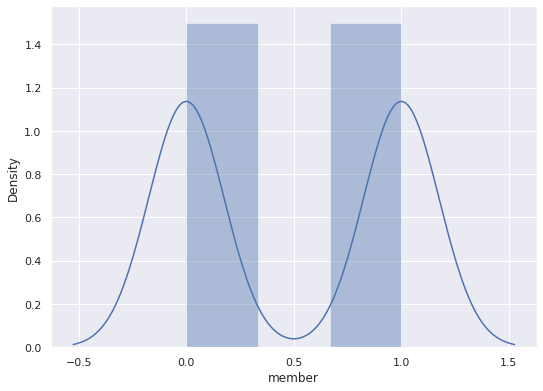

In [277]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

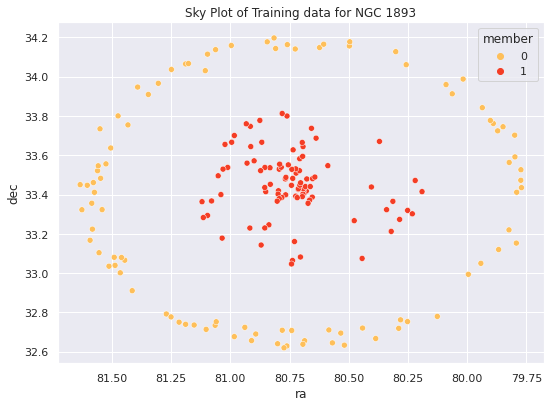

In [278]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 1893')
plt.show()

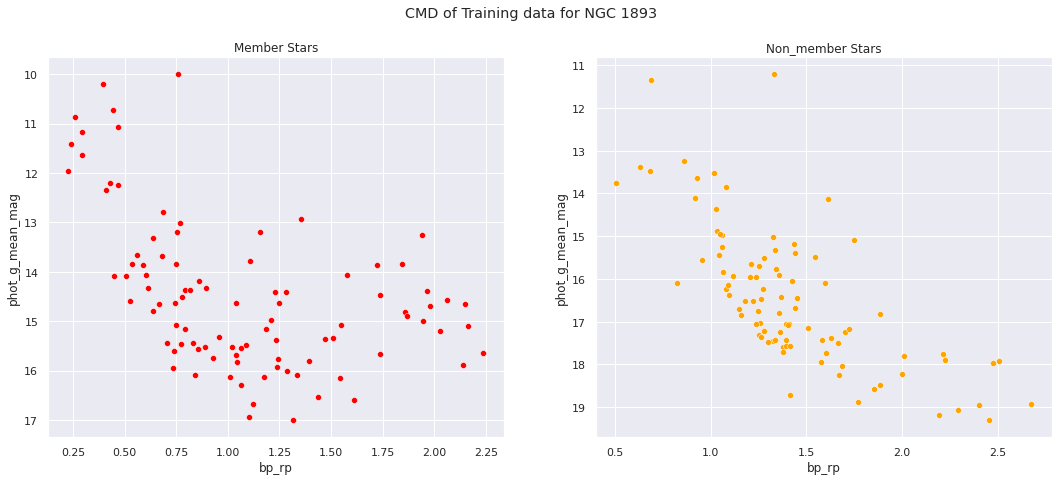

In [279]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 1893 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


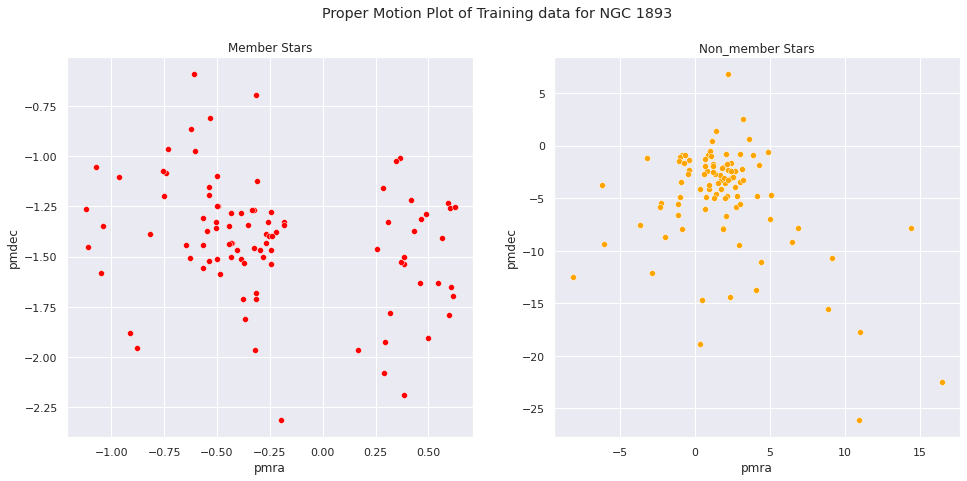

In [280]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 1893 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


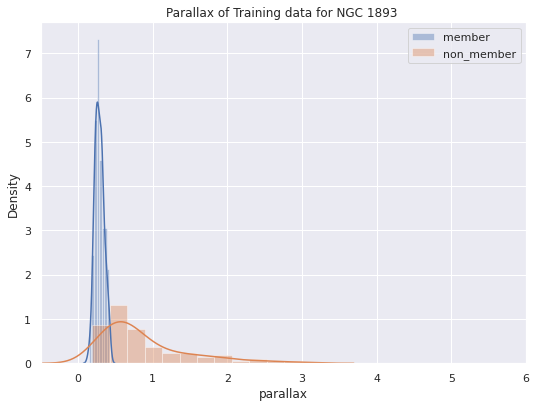

In [281]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 1893 ')
plt.legend()
plt.show()

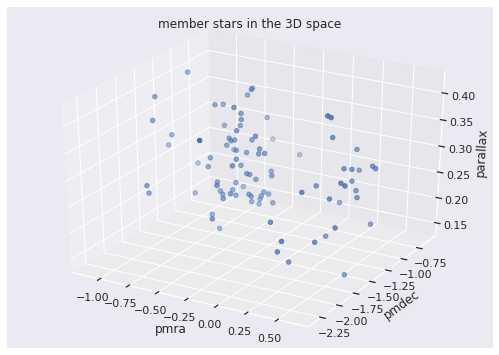

In [282]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


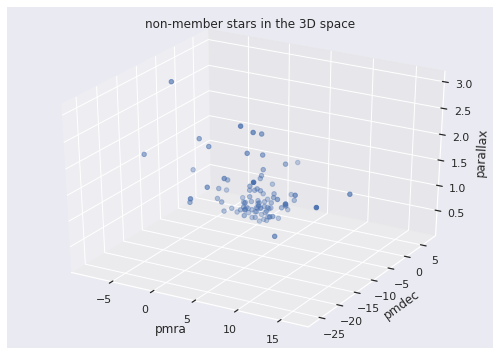

In [283]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [284]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [285]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.380751
parallax    0.321382
pmdec       0.297867
dtype: float64

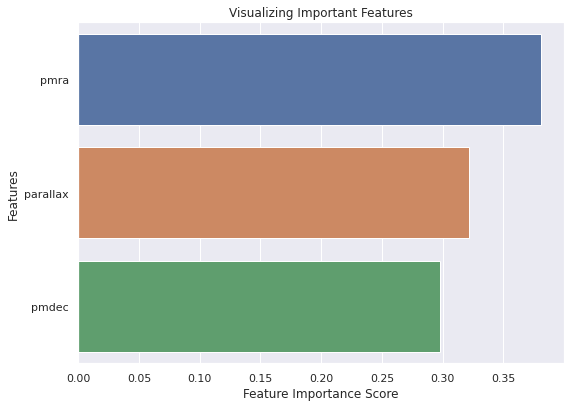

In [286]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [287]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [288]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [289]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [290]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [291]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [292]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [293]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.125,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 600}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.879
Accuracy on test data: 0.930


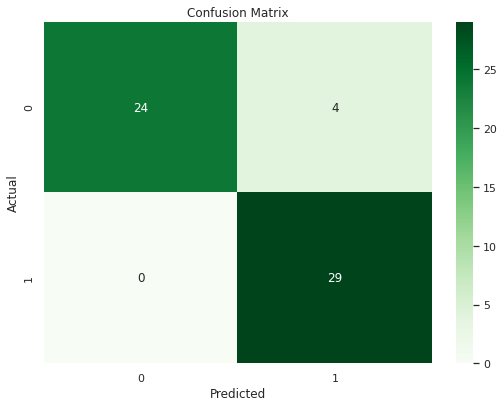

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.88      1.00      0.94        29

    accuracy                           0.93        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.94      0.93      0.93        57



In [294]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.957
Precision on testing data: 0.848
Accuracy on test data: 0.895


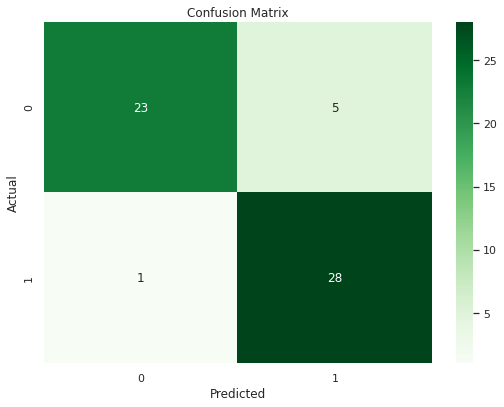

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.85      0.97      0.90        29

    accuracy                           0.89        57
   macro avg       0.90      0.89      0.89        57
weighted avg       0.90      0.89      0.89        57



In [295]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [296]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center
count,1.237800e+04,1.237800e+04,1.237800e+04,12378.0,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.000000,12378.0,12378.000000,12376.000000,12376.000000,12378.000000,12378.000000,12378.000000,...,1.227600e+04,12276.000000,12276.000000,12276.000000,12276.000000,12378.000000,12276.000000,12276.000000,12276.000000,436.000000,436.000000,12378.000000,436.000000,436.000000,436.000000,12378.000000,12378.000000,12378.000000,12378.000000,8622.000000,8622.000000,8622.000000,8622.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,5478.0,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,5478.000000,12378.000000,12378.000000,12378.000000,12378.000000
mean,1.635721e+18,1.816635e+17,8.464903e+08,2015.5,80.700274,0.102261,33.420351,0.082010,0.953314,0.112351,12.703667,2.177411,0.213461,-5.212910,0.151872,-0.167736,0.112152,-0.216405,0.242851,-0.337343,0.195002,-0.439057,0.112748,0.332993,-0.200106,151.495395,7.416707,150.630312,0.865083,1.087970,218.083374,0.136031,3.108282,31.0,26.647312,1.493215,0.021984,-0.088988,17.299645,10.283810,...,3.031549e+04,69.448900,342.385590,15.326466,1.315644,0.054451,1.406201,0.627310,0.778889,4.434429,2.288790,0.175796,5289.334961,3.545871,-0.077982,173.585013,-1.663375,82.122270,10.235721,100028.198910,4981.267090,4804.106934,5248.953613,0.872547,0.642461,1.132339,0.432078,0.316276,0.562907,200111.0,2.379443,2.150856,2.555885,7.305991,6.061525,8.550458,0.535617,25.655959,58.888307,0.535602
std,0.000000e+00,7.392731e+14,4.844852e+08,0.0,0.485111,0.107309,0.396731,0.084011,1.029275,0.113109,17.195681,8.154280,0.229834,10.911144,0.159520,0.186814,0.153490,0.190231,0.190566,0.123385,0.146712,0.137724,0.167071,0.121858,0.196310,18.883394,32.751200,18.804897,1.357687,6.555913,1112.673706,0.349545,42.895574,0.0,63.666149,0.098596,0.022237,0.070610,2.105553,0.770192,...,1.838748e+05,552.748406,279.628357,1.602976,0.140921,0.256970,0.474211,0.275852,0.219594,33.288711,2.765498,0.972410,686.943542,0.631696,0.329484,0.393594,0.408105,0.412234,0.395936,231.453843,728.020935,704.289612,767.882935,0.507697,0.472234,0.568903,0.253589,0.233840,0.287288,0.0,3.984028,3.584105,4.300780,36.310390,29.920795,42.787983,0.186318,65.748685,132.163237,0.186304
min,1.635721e+18,1.808463e+17,3.186200e+04,2015.5,79.727501,0.021139,32.612023,0.017093,0.108522,0.022131,3.000890,-80.417052,0.04

In [297]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_1893_center'] <= cantat_radius*2]

In [298]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [299]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [300]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [301]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    11292
1      896
Name: member, dtype: int64

In [302]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

896

In [303]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

896

In [304]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member,PMemb
count,8.960000e+02,8.960000e+02,8.960000e+02,896.0,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.0,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,49.000000,49.000000,896.000000,49.000000,49.000000,49.000000,896.000000,896.000000,896.000000,896.000000,855.00000,855.000000,855.000000,855.000000,361.00000,361.000000,361.000000,361.000000,361.000000,361.000000,247.0,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,896.000000,896.000000,896.000000,896.000000,896.0,896.000000
mean,1.635721e+18,1.817776e+17,8.522794e+08,2015.5,80.736882,0.053100,33.452861,0.042940,0.327828,0.059144,6.278343,-0.251108,0.108573,-1.557444,0.077851,-0.138012,0.132679,-0.222131,0.237821,-0.335624,0.184116,-0.437946,0.110143,0.333514,-0.147538,156.995536,5.426339,156.156250,0.839286,0.327526,162.324051,0.036763,0.568234,31.0,27.989780,1.509133,0.011795,-0.073526,17.912946,10.429688,...,454.058746,14.676115,1.283799,0.049107,1.346750,0.608269,0.738481,-8.389044,2.195493,0.265625,4892.856934,3.244898,-0.061224,173.575384,-1.619840,82.155339,10.266211,100015.08655,4835.557129,4652.380371,5134.665039,1.38211,1.142606,1.719488,0.684065,0.559906,0.857866,200111.0,6.431771,5.734899,6.942204,25.112513,19.655453,30.569584,0.557165,7.481404,26.433162,0.557119,1.0,0.715419
std,0.000000e+00,7.550473e+14,4.868158e+08,0.0,0.498312,0.021728,0.403305,0.017299,0.084423,0.023506,2.793208,0.913766,0.047911,1.368826,0.035417,0.159810,0.122571,0.143761,0.154834,0.104523,0.125993,0.125692,0.130364,0.092875,0.170354,17.453529,28.300367,17.375065,1.295828,2.817146,73.912674,0.076577,2.062356,0.0,50.980827,0.082310,0.004852,0.062412,1.931569,0.659753,...,275.406158,1.226617,0.055713,0.216212,0.444893,0.261990,0.186092,27.695972,2.386435,1.162150,478.713623,0.469069,0.299872,0.392572,0.426096,0.424562,0.401259,167.04620,808.817810,769.125000,828.972473,0.45491,0.463109,0.486233,0.231341,0.231576,0.250921,0.0,6.137291,5.550101,6.589942,44.087082,34.996567,53.232136,0.168913,5.967073,19.617659,0.168879,0.0,0.155617
min,1.635721e+18,1.808798e+17,8.270400e+05,2015.5,79.738642,0.021950,32.626720,0.017495,0.118347,0.022973,3.004675,-5.784158,0.043654,-9.275658,0.030623,-0.729759,-0.309718,-0.676269,-0.440852,-0.796510,-0.354671,-0.792226,-0.576535,-0.007557,-0.808544,104.000000,0.000000,104.000000,0.000000,-5.617080,53.129757,0.000000,0.000

In [305]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,9.500000e+01,9.500000e+01,9.500000e+01,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,2.000000,2.000000,95.000000,2.000000,2.000000,2.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,1.635721e+18,1.814778e+17,9.086183e+08,2015.5,80.737729,0.045930,33.451814,0.037100,0.286307,0.053067,5.802793,-0.236717,0.087543,-1.415327,0.062652,-0.176406,0.187772,-0.216885,0.275988,-0.388526,0.161097,-0.502305,0.165382,0.362657,-0.089516,151.400000,20.315789,150.368421,1.031579,0.751268,167.929306,0.019309,0.310494,31.0,67.488770,1.564288,0.010065,-0.095931,17.231579,10.368421,...,526.608459,13.865883,1.264505,0.063158,1.073779,0.459204,0.614576,18.699157,0.960644,0.084211,5750.000000,4.000000,0.0,173.577386,-1.620280,82.155999,10.264513,100043.168421,5605.711426,5379.130371,5940.588867,1.332680,1.073189,1.754675,0.665039,0.530461,0.878406,200111.0,7.369964,6.384611,8.115256,74.662605,56.289097,93.036079,0.202596,5.822002,24.711216,0.488421,0.202592,1.0
std,0.000000e+00,6.373655e+14,5.161394e+08,0.0,0.202292,0.014608,0.164871,0.011474,0.060320,0.016115,1.969565,0.475649,0.028485,0.299638,0.020973,0.175198,0.128979,0.138882,0.144348,0.117959,0.139866,0.102267,0.111213,0.100389,0.161293,17.039004,49.197661,16.971223,1.439951,3.767038,86.005760,0.046648,1.026811,0.0,99.665451,0.100472,0.003060,0.066510,1.915517,0.669274,...,507.556061,1.425294,0.054896,0.244537,0.521627,0.287345,0.237122,29.091288,0.217557,0.646811,353.553406,0.707107,0.0,0.151073,0.181336,0.173589,0.162810,288.633599,1365.227661,1281.678467,1375.727295,0.480705,0.490865,0.488560,0.229899,0.242647,0.247465,0.0,5.314381,4.684245,5.825412,150.146576,114.118439,186.396912,0.133883,3.097324,8.765409,0.339857,0.133883,0.0
min,1.635721e+18,1.809525e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.034939,-1.120928,0.049882,-2.314877,0.035424,-0.669206,-0.100532,-0.597216,-0.131934,-0.647679,-0.158013,-0.717670,-0.130885,0.081193,-0.485993,114.000000,0.000000,113.000000,0.000000,-5.626834,73.171104,0.000000,0.000000,31.0,2.916422,1.333996,0.005114,-0.255496,13.000000,9.000000,...,8.051486,9.54

#### Visualization

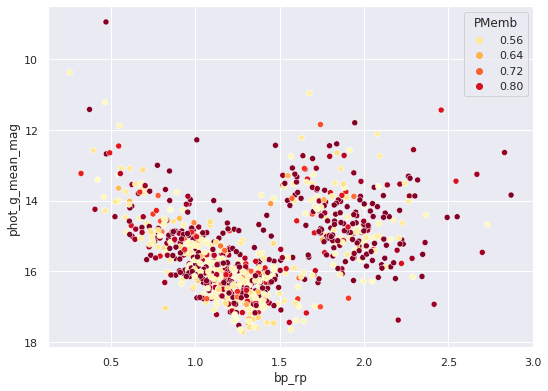

In [306]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

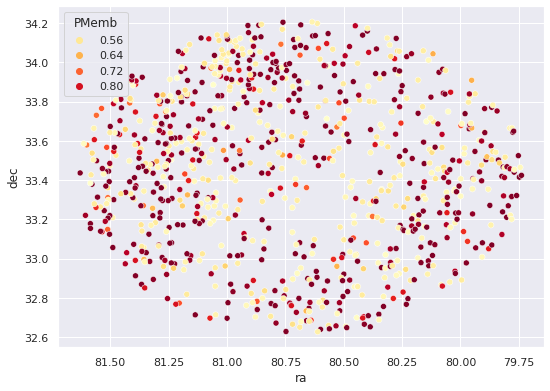

In [307]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

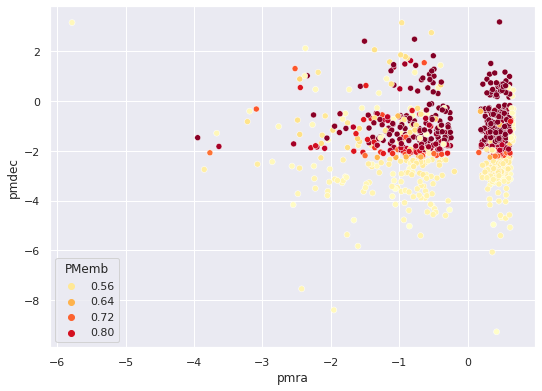

In [308]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


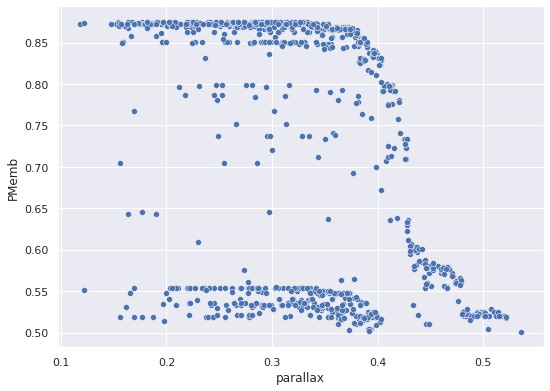

In [309]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [310]:
# saving the files as csv
# all_stars.to_csv('gaia_1893_membership_prob.csv')

potentialMember.to_csv('NGC_1893_membership_prob.csv')


### Comparing the old and new predicted members

In [311]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [312]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1893_center,member,PMemb
count,9.910000e+02,9.910000e+02,9.910000e+02,991.0,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.0,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,...,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,51.000000,51.000000,991.000000,51.000000,51.000000,51.000000,991.000000,991.000000,991.000000,991.000000,950.000000,950.000000,950.000000,950.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,991.000000,991.000000,991.000000,991.000000,991.0,991.000000
mean,1.635721e+18,1.817489e+17,8.576802e+08,2015.5,80.736963,0.052412,33.452760,0.042380,0.323848,0.058561,6.232756,-0.249729,0.106557,-1.543820,0.076394,-0.141692,0.137961,-0.221628,0.241480,-0.340696,0.181909,-0.444116,0.115438,0.336308,-0.141976,156.459132,6.853683,155.601413,0.857719,0.368147,162.861465,0.035090,0.543527,31.0,31.776262,1.514420,0.011629,-0.075674,17.847629,10.423814,...,461.013611,14.598445,1.281950,0.050454,1.320583,0.593979,0.726603,-7.326762,2.147067,0.248234,4926.470703,3.274510,-0.058824,173.575576,-1.619882,82.155402,10.266048,100017.894737,4912.572266,4725.056641,5215.258789,1.377628,1.136312,1.722678,0.682339,0.557236,0.859729,200111.0,6.514858,5.792438,7.046091,29.500708,22.899759,36.101673,0.523175,7.322329,26.268091,0.523133,1.0,0.693658
std,0.000000e+00,7.495071e+14,4.897123e+08,0.0,0.477883,0.021249,0.386817,0.016911,0.083297,0.022965,2.727873,0.881104,0.046804,1.305436,0.034580,0.161650,0.124196,0.143240,0.154200,0.106961,0.127493,0.125040,0.129627,0.093961,0.170288,17.483617,31.194661,17.411988,1.310771,2.921936,75.126015,0.074394,1.987722,0.0,58.550442,0.085716,0.004737,0.063127,1.939487,0.660577,...,305.756531,1.268878,0.055898,0.218991,0.459605,0.267992,0.194879,27.955502,2.350919,1.124086,500.734772,0.493089,0.294059,0.376154,0.408972,0.407207,0.384806,182.849733,909.260254,861.761353,929.725281,0.456898,0.465475,0.485930,0.230986,0.232439,0.250369,0.0,6.065919,5.474384,6.524523,62.371681,48.311359,76.534767,0.195967,5.773995,18.854037,0.195934,0.0,0.193210
min,1.635721e+18,1.808798e+17,8.270400e+05,2015.5,79.738642,0.021950,32.626720,0.017495,0.118347,0.022973,3.004675,-5.784158,0.043654,-9.275658,0.030623,-0.729759,-0.309718,-0.676269,-0.440852,-0.796510,-0.354671,-0.792226,-0.576535,-0.007557,-0.808544,104.000000,0.000000,104.000000,0.000000,-5.626834,53.129757,0.000000

In [313]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1893_center,member
count,9.500000e+01,9.500000e+01,9.500000e+01,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,2.000000,2.000000,95.000000,2.000000,2.000000,2.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,1.635721e+18,1.814778e+17,9.086183e+08,2015.5,80.737729,0.045930,33.451814,0.037100,0.286307,0.053067,5.802793,-0.236717,0.087543,-1.415327,0.062652,-0.176406,0.187772,-0.216885,0.275988,-0.388526,0.161097,-0.502305,0.165382,0.362657,-0.089516,151.400000,20.315789,150.368421,1.031579,0.751268,167.929306,0.019309,0.310494,31.0,67.488770,1.564288,0.010065,-0.095931,17.231579,10.368421,...,526.608459,13.865883,1.264505,0.063158,1.073779,0.459204,0.614576,18.699157,0.960644,0.084211,5750.000000,4.000000,0.0,173.577386,-1.620280,82.155999,10.264513,100043.168421,5605.711426,5379.130371,5940.588867,1.332680,1.073189,1.754675,0.665039,0.530461,0.878406,200111.0,7.369964,6.384611,8.115256,74.662605,56.289097,93.036079,0.202596,5.822002,24.711216,0.488421,0.202592,1.0
std,0.000000e+00,6.373655e+14,5.161394e+08,0.0,0.202292,0.014608,0.164871,0.011474,0.060320,0.016115,1.969565,0.475649,0.028485,0.299638,0.020973,0.175198,0.128979,0.138882,0.144348,0.117959,0.139866,0.102267,0.111213,0.100389,0.161293,17.039004,49.197661,16.971223,1.439951,3.767038,86.005760,0.046648,1.026811,0.0,99.665451,0.100472,0.003060,0.066510,1.915517,0.669274,...,507.556061,1.425294,0.054896,0.244537,0.521627,0.287345,0.237122,29.091288,0.217557,0.646811,353.553406,0.707107,0.0,0.151073,0.181336,0.173589,0.162810,288.633599,1365.227661,1281.678467,1375.727295,0.480705,0.490865,0.488560,0.229899,0.242647,0.247465,0.0,5.314381,4.684245,5.825412,150.146576,114.118439,186.396912,0.133883,3.097324,8.765409,0.339857,0.133883,0.0
min,1.635721e+18,1.809525e+17,6.862069e+06,2015.5,80.190774,0.025518,33.046711,0.020848,0.144446,0.027534,3.034939,-1.120928,0.049882,-2.314877,0.035424,-0.669206,-0.100532,-0.597216,-0.131934,-0.647679,-0.158013,-0.717670,-0.130885,0.081193,-0.485993,114.000000,0.000000,113.000000,0.000000,-5.626834,73.171104,0.000000,0.000000,31.0,2.916422,1.333996,0.005114,-0.255496,13.000000,9.000000,...,8.051486,9.54

In [314]:
concatenated.dataset.value_counts()

New_member    896
Old_member     95
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

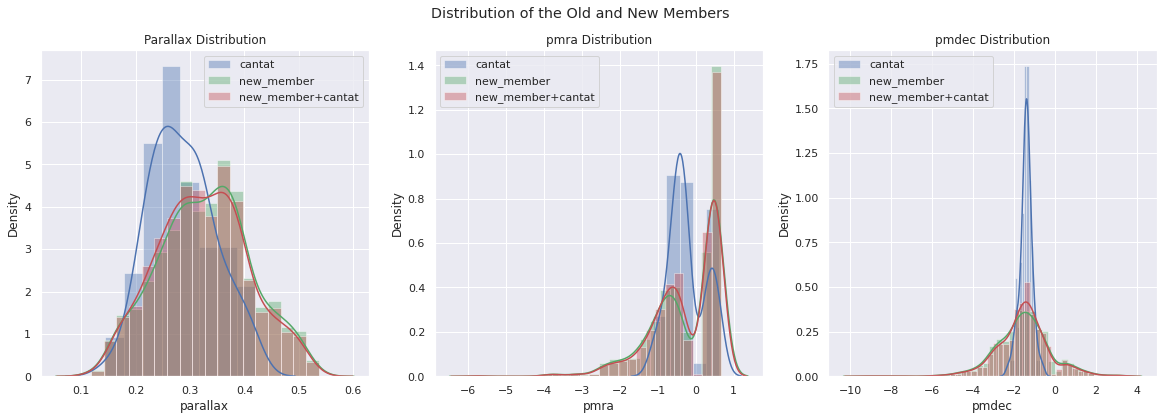

In [315]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


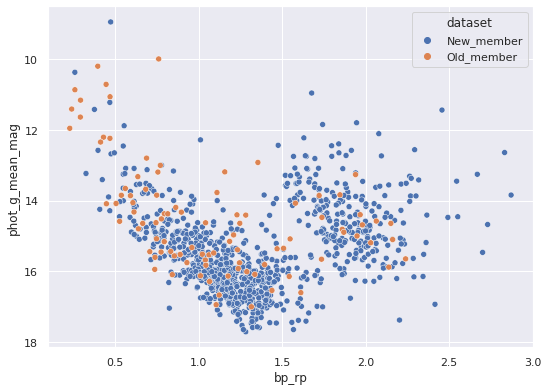

In [316]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

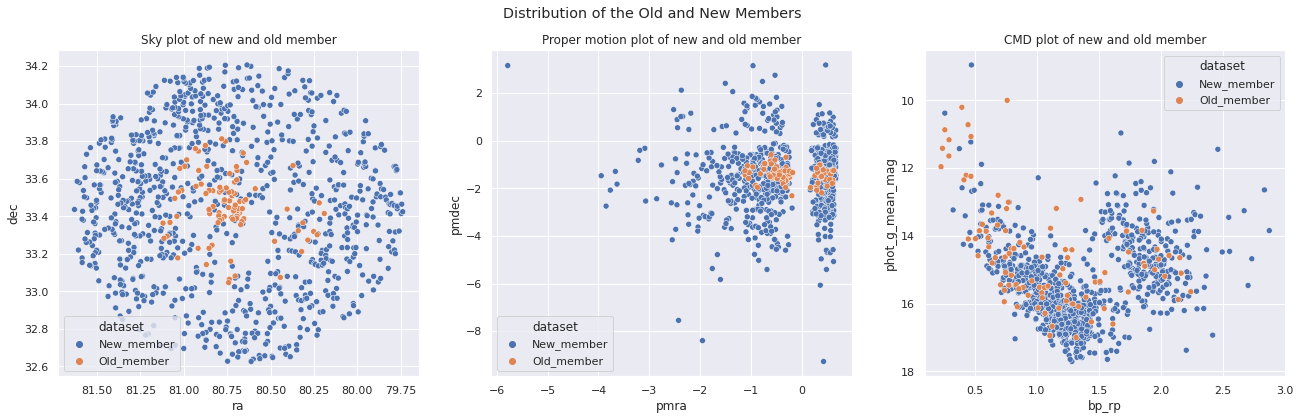

In [317]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

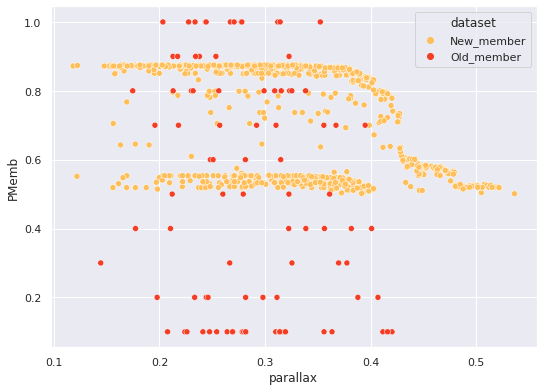

In [318]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [319]:
# pd_prof.ProfileReport(potentialMember)

In [320]:
#files.download('NGC_1893_cantat.csv')

#files.download('NGC_1893_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


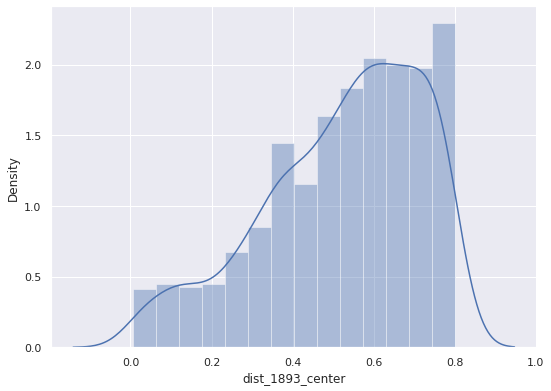

In [321]:
sns.distplot(concatenated['dist_1893_center'])

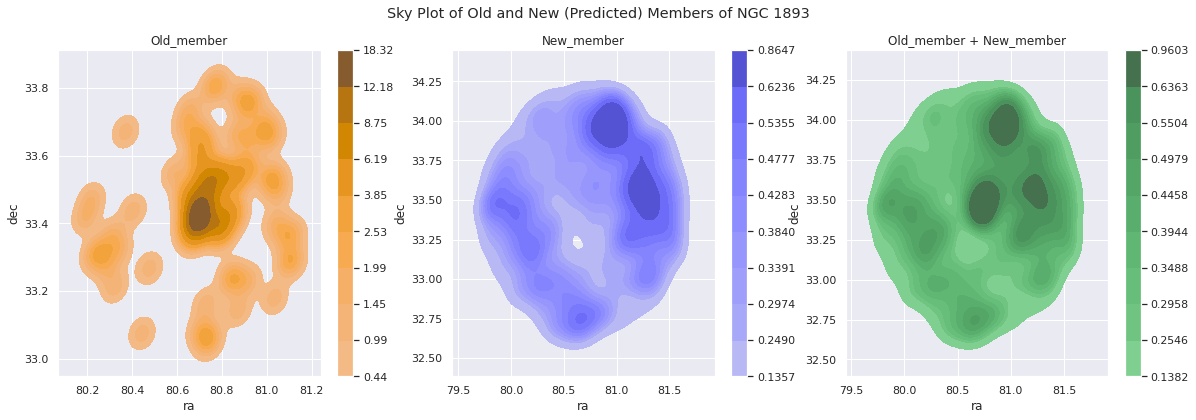

In [322]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 1893')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

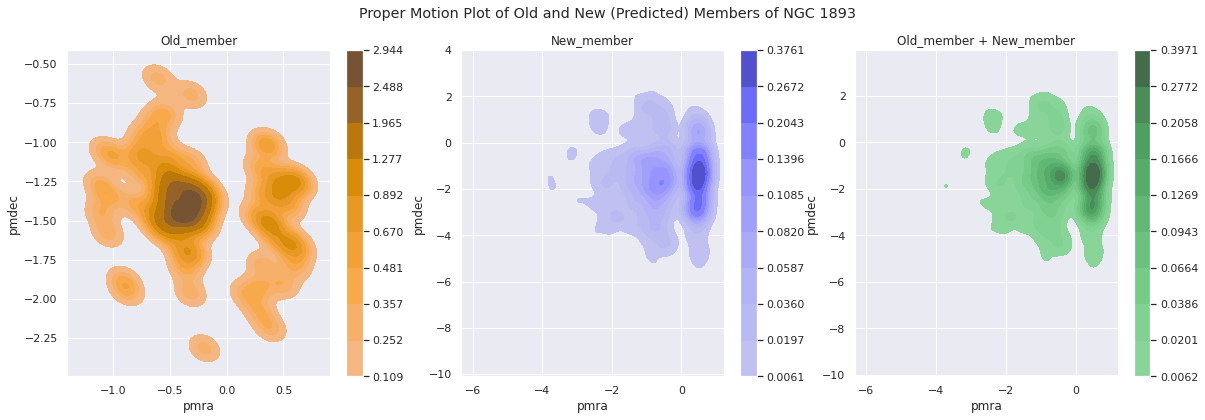

In [323]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 1893')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [324]:
#files.download('NGC_1893_cantat.csv')

potentialMember.to_csv('NGC_1893_additional_member_prob.csv')
concatenated.to_csv('NGC_1893_all_member_prob.csv')

files.download('NGC_1893_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_1893_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>